In [296]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
from scipy.stats import linregress
from matplotlib.dates import DateFormatter

In [297]:
import warnings
warnings.filterwarnings("ignore")

In [298]:
covid_data_to_load = "owid-covid-data.csv"

# Read School and Student Data File and store into Pandas DataFrames
covid_data = pd.read_csv(covid_data_to_load)


In [299]:
covid_data.tail(20)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
166306,ZWE,Africa,Zimbabwe,2022-02-14,231603.0,222.0,171.571,5374.0,0.0,1.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166307,ZWE,Africa,Zimbabwe,2022-02-15,231603.0,0.0,142.857,5374.0,0.0,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166308,ZWE,Africa,Zimbabwe,2022-02-16,232213.0,610.0,210.429,5379.0,5.0,1.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166309,ZWE,Africa,Zimbabwe,2022-02-17,232598.0,385.0,222.571,5381.0,2.0,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166310,ZWE,Africa,Zimbabwe,2022-02-18,233030.0,432.0,259.429,5385.0,4.0,1.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166311,ZWE,Africa,Zimbabwe,2022-02-19,233224.0,194.0,275.000,5386.0,1.0,1.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166312,ZWE,Africa,Zimbabwe,2022-02-20,233352.0,128.0,281.571,5386.0,0.0,1.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166313,ZWE,Africa,Zimbabwe,2022-02-21,233571.0,219.0,281.143,5386.0,0.0,1.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166314,ZWE,Africa,Zimbabwe,2022-02-22,233980.0,409.0,339.571,5388.0,2.0,2.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166315,ZWE,Africa,Zimbabwe,2022-02-23,234589.0,609.0,339.429,5388.0,0.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [300]:
# columns selected
data_df = covid_data[["date", "location", "total_cases", "total_deaths", "icu_patients", "hosp_patients", "total_tests", "positive_rate", "total_vaccinations", "people_vaccinated", "people_fully_vaccinated", "total_boosters", "population"]]
data_df.head()

,date,location,total_cases,total_deaths,icu_patients,hosp_patients,total_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population
0,2020-02-24,Afghanistan,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0
1,2020-02-25,Afghanistan,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0
2,2020-02-26,Afghanistan,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0
3,2020-02-27,Afghanistan,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0
4,2020-02-28,Afghanistan,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0


In [301]:
# all data grouped by location df
data_1_df = data_df.groupby(["location"])[["total_cases", "total_deaths", "icu_patients", "hosp_patients", "total_tests", "positive_rate", "total_vaccinations", "people_vaccinated", "people_fully_vaccinated", "total_boosters", "population"]].max()
data_1_df.head()


,total_cases,total_deaths,icu_patients,hosp_patients,total_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population
location,,,,,,,,,,,
Afghanistan,174331.0,7622.0,NaN,NaN,NaN,NaN,5535254.0,4907058.0,4231984.0,NaN,3.983543e+07
Africa,11268386.0,249206.0,NaN,NaN,NaN,NaN,409436445.0,254640120.0,168179398.0,13023688.0,1.373486e+09
Albania,272030.0,3478.0,NaN,NaN,1590013.0,0.9666,2708574.0,1270745.0,1198759.0,239070.0,2.872934e+06
Algeria,265227.0,6853.0,67.0,NaN,NaN,NaN,13631683.0,7456361.0,6076272.0,436274.0,4.461663e+07
Andorra,38434.0,151.0,NaN,NaN,300307.0,0.9515,142420.0,57797.0,53250.0,24732.0,7.735400e+04


In [302]:
# creating a list of our 4 countries
country = ["Australia", "India", "United States", "Mexico"]

country_df = data_1_df.loc[country,: ]
country_df.head()

,total_cases,total_deaths,icu_patients,hosp_patients,total_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population
location,,,,,,,,,,,
Australia,3362035.0,5416.0,424.0,5390.0,63878542.0,0.4606,5.446970e+07,22091094.0,20520964.0,11857647.0,2.578822e+07
India,42962953.0,515036.0,NaN,NaN,770973356.0,0.2268,1.786849e+09,967153861.0,800304849.0,19390638.0,1.393409e+09
United States,79265726.0,958437.0,28891.0,154536.0,820619379.0,0.2940,5.548682e+08,254002347.0,215274110.0,94925621.0,3.329151e+08
Mexico,5554392.0,319604.0,NaN,NaN,14505516.0,0.6960,1.830434e+08,85315634.0,79050604.0,NaN,1.302622e+08


In [303]:
# 4 countries df 
countries_df = data_df.loc[data_df['location'].isin(country)]
countries_df.head(20)

,date,location,total_cases,total_deaths,icu_patients,hosp_patients,total_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population
8908,2020-01-26,Australia,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25788217.0
8909,2020-01-27,Australia,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25788217.0
8910,2020-01-28,Australia,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25788217.0
8911,2020-01-29,Australia,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25788217.0
8912,2020-01-30,Australia,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25788217.0
8913,2020-01-31,Australia,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25788217.0
8914,2020-02-01,Australia,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25788217.0
8915,2020-02-02,Australia,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25788217.0
8916,2020-02-03,Australia,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25788217.0
8917,2020-02-04,Australia,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25788217.0


In [304]:
# total vaccinations df
vacination_df = covid_data[["date", "location", "people_vaccinated", "people_fully_vaccinated", "population", "total_deaths", "total_cases"]]
vacination_df.head()

,date,location,people_vaccinated,people_fully_vaccinated,population,total_deaths,total_cases
0,2020-02-24,Afghanistan,NaN,NaN,39835428.0,NaN,5.0
1,2020-02-25,Afghanistan,NaN,NaN,39835428.0,NaN,5.0
2,2020-02-26,Afghanistan,NaN,NaN,39835428.0,NaN,5.0
3,2020-02-27,Afghanistan,NaN,NaN,39835428.0,NaN,5.0
4,2020-02-28,Afghanistan,NaN,NaN,39835428.0,NaN,5.0


In [305]:
# total vaccinations df
vacination_country_df = vacination_df.loc[vacination_df['location'].isin(country)]
vacination_country_df.head()

,date,location,people_vaccinated,people_fully_vaccinated,population,total_deaths,total_cases
8908,2020-01-26,Australia,NaN,NaN,25788217.0,NaN,4.0
8909,2020-01-27,Australia,NaN,NaN,25788217.0,NaN,5.0
8910,2020-01-28,Australia,NaN,NaN,25788217.0,NaN,5.0
8911,2020-01-29,Australia,NaN,NaN,25788217.0,NaN,6.0
8912,2020-01-30,Australia,NaN,NaN,25788217.0,NaN,9.0


In [306]:
# total vaccinations df
total_vacination = vacination_country_df.groupby(["location"])[["people_vaccinated", "people_fully_vaccinated", "population", "total_deaths", "total_cases"]].max()
total_vacination.head()

,people_vaccinated,people_fully_vaccinated,population,total_deaths,total_cases
location,,,,,
Australia,22091094.0,20520964.0,2.578822e+07,5416.0,3362035.0
India,967153861.0,800304849.0,1.393409e+09,515036.0,42962953.0
Mexico,85315634.0,79050604.0,1.302622e+08,319604.0,5554392.0
United States,254002347.0,215274110.0,3.329151e+08,958437.0,79265726.0


In [307]:
country1 = ["Australia"]
country2 = ["United States"]
country3 = ["Mexico"]
country4 = ["India"]

In [308]:
# Individual Aus df
aus_df = vacination_country_df.loc[vacination_country_df['location'].isin(country1)]
aus_df = aus_df.rename(columns={"people_vaccinated":"Aus_people_vaccinated", 
                                "people_fully_vaccinated":"Aus_people_fully_vaccinated",
                                "population":"Aus_population",
                                "total_deaths":"Aus_total_deaths",
                                "total_cases":"Aus_total_cases"
                           })
aus_df.tail()

,date,location,Aus_people_vaccinated,Aus_people_fully_vaccinated,Aus_population,Aus_total_deaths,Aus_total_cases
9673,2022-03-01,Australia,22063566.0,20490408.0,25788217.0,5269.0,3256772.0
9674,2022-03-02,Australia,22070693.0,20497591.0,25788217.0,5316.0,3296784.0
9675,2022-03-03,Australia,22078148.0,20505135.0,25788217.0,5354.0,3321943.0
9676,2022-03-04,Australia,22085942.0,20513850.0,25788217.0,5402.0,3344659.0
9677,2022-03-05,Australia,22091094.0,20520964.0,25788217.0,5416.0,3362035.0


In [309]:
# Individual US df
US_df = vacination_country_df.loc[vacination_country_df['location'].isin(country2)]
US_df = US_df.rename(columns={"people_vaccinated":"US_people_vaccinated", 
                                "people_fully_vaccinated":"US_people_fully_vaccinated",
                                "population":"US_population",
                                "total_deaths":"US_total_deaths",
                                "total_cases":"US_total_cases"
                           })
US_df.tail()

,date,location,US_people_vaccinated,US_people_fully_vaccinated,US_population,US_total_deaths,US_total_cases
157991,2022-03-01,United States,253899142.0,215166280.0,332915074.0,952423.0,79091361.0
157992,2022-03-02,United States,253956787.0,215226511.0,332915074.0,954518.0,79143716.0
157993,2022-03-03,United States,253995527.0,215266826.0,332915074.0,956261.0,79196008.0
157994,2022-03-04,United States,254002347.0,215274110.0,332915074.0,958144.0,79250509.0
157995,2022-03-05,United States,254002347.0,215274110.0,332915074.0,958437.0,79265726.0


In [310]:
# Individual India df
India_df = vacination_country_df.loc[vacination_country_df['location'].isin(country4)]
India_df = India_df.rename(columns={"people_vaccinated":"India_people_vaccinated", 
                                "people_fully_vaccinated":"India_people_fully_vaccinated",
                                "population":"India_population",
                                "total_deaths":"India_total_deaths",
                                "total_cases":"India_total_cases"
                           })
India_df.tail()

,date,location,India_people_vaccinated,India_people_fully_vaccinated,India_population,India_total_deaths,India_total_cases
70439,2022-03-01,India,965923463.0,791803734.0,1.393409e+09,514246.0,42938599.0
70440,2022-03-02,India,966125454.0,793112322.0,1.393409e+09,514388.0,42945160.0
70441,2022-03-03,India,966508496.0,795778169.0,1.393409e+09,514589.0,42951556.0
70442,2022-03-04,India,966810216.0,797997103.0,1.393409e+09,514878.0,42957477.0
70443,2022-03-05,India,967153861.0,800304849.0,1.393409e+09,515036.0,42962953.0


In [311]:
# Individual Mexico df
Mexico_df = vacination_country_df.loc[vacination_country_df['location'].isin(country3)]
Mexico_df = Mexico_df.rename(columns={"people_vaccinated":"Mex_people_vaccinated", 
                                "people_fully_vaccinated":"Mex_people_fully_vaccinated",
                                "population":"Mex_population",
                                "total_deaths":"Mex_total_deaths",
                                "total_cases":"Mex_total_cases"
                           })
Mexico_df.tail()

,date,location,Mex_people_vaccinated,Mex_people_fully_vaccinated,Mex_population,Mex_total_deaths,Mex_total_cases
98790,2022-03-01,Mexico,85238025.0,78945844.0,130262220.0,318531.0,5521744.0
98791,2022-03-02,Mexico,85261393.0,78987826.0,130262220.0,318531.0,5521744.0
98792,2022-03-03,Mexico,85292153.0,79014513.0,130262220.0,318835.0,5534086.0
98793,2022-03-04,Mexico,85315634.0,79050604.0,130262220.0,319296.0,5544644.0
98794,2022-03-05,Mexico,NaN,NaN,130262220.0,319604.0,5554392.0


In [312]:
# rich country datasets
rich_combined_travel_df = pd.merge(aus_df, US_df, how="outer", on="date")
rich_combined_travel_df

,date,location_x,Aus_people_vaccinated,Aus_people_fully_vaccinated,Aus_population,Aus_total_deaths,Aus_total_cases,location_y,US_people_vaccinated,US_people_fully_vaccinated,US_population,US_total_deaths,US_total_cases
0,2020-01-26,Australia,NaN,NaN,25788217.0,NaN,4.0,United States,NaN,NaN,332915074.0,NaN,5.0
1,2020-01-27,Australia,NaN,NaN,25788217.0,NaN,5.0,United States,NaN,NaN,332915074.0,NaN,5.0
2,2020-01-28,Australia,NaN,NaN,25788217.0,NaN,5.0,United States,NaN,NaN,332915074.0,NaN,5.0
3,2020-01-29,Australia,NaN,NaN,25788217.0,NaN,6.0,United States,NaN,NaN,332915074.0,NaN,6.0
4,2020-01-30,Australia,NaN,NaN,25788217.0,NaN,9.0,United States,NaN,NaN,332915074.0,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,2022-03-05,Australia,22091094.0,20520964.0,25788217.0,5416.0,3362035.0,United States,254002347.0,215274110.0,332915074.0,958437.0,79265726.0
770,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,United States,NaN,NaN,332915074.0,NaN,1.0
771,2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,United States,NaN,NaN,332915074.0,NaN,1.0
772,2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,United States,NaN,NaN,332915074.0,NaN,2.0


In [313]:
# poor country datasets
poor_combined_travel_df = pd.merge(India_df, Mexico_df, how="outer", on="date")
poor_combined_travel_df

,date,location_x,India_people_vaccinated,India_people_fully_vaccinated,India_population,India_total_deaths,India_total_cases,location_y,Mex_people_vaccinated,Mex_people_fully_vaccinated,Mex_population,Mex_total_deaths,Mex_total_cases
0,2020-01-30,India,NaN,NaN,1.393409e+09,NaN,1.0,Mexico,NaN,NaN,130262220.0,NaN,NaN
1,2020-01-31,India,NaN,NaN,1.393409e+09,NaN,1.0,Mexico,NaN,NaN,130262220.0,NaN,NaN
2,2020-02-01,India,NaN,NaN,1.393409e+09,NaN,1.0,Mexico,NaN,NaN,130262220.0,NaN,NaN
3,2020-02-02,India,NaN,NaN,1.393409e+09,NaN,2.0,Mexico,NaN,NaN,130262220.0,NaN,NaN
4,2020-02-03,India,NaN,NaN,1.393409e+09,NaN,3.0,Mexico,NaN,NaN,130262220.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,Mexico,NaN,NaN,130262220.0,NaN,NaN
791,2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,Mexico,NaN,NaN,130262220.0,NaN,NaN
792,2020-01-27,NaN,NaN,NaN,NaN,NaN,NaN,Mexico,NaN,NaN,130262220.0,NaN,NaN
793,2020-01-28,NaN,NaN,NaN,NaN,NaN,NaN,Mexico,NaN,NaN,130262220.0,NaN,NaN


In [314]:
# combining rich and poor country data sets

combined_travel_df = pd.merge(rich_combined_travel_df, poor_combined_travel_df, how='outer', on='date')
combined_travel_df = combined_travel_df[combined_travel_df['US_total_cases'].notna()]
combined_travel_df.head(20)

,date,location_x_x,Aus_people_vaccinated,Aus_people_fully_vaccinated,Aus_population,Aus_total_deaths,Aus_total_cases,location_y_x,US_people_vaccinated,US_people_fully_vaccinated,...,India_people_fully_vaccinated,India_population,India_total_deaths,India_total_cases,location_y_y,Mex_people_vaccinated,Mex_people_fully_vaccinated,Mex_population,Mex_total_deaths,Mex_total_cases
0,2020-01-26,Australia,NaN,NaN,25788217.0,NaN,4.0,United States,NaN,NaN,...,NaN,NaN,NaN,NaN,Mexico,NaN,NaN,130262220.0,NaN,NaN
1,2020-01-27,Australia,NaN,NaN,25788217.0,NaN,5.0,United States,NaN,NaN,...,NaN,NaN,NaN,NaN,Mexico,NaN,NaN,130262220.0,NaN,NaN
2,2020-01-28,Australia,NaN,NaN,25788217.0,NaN,5.0,United States,NaN,NaN,...,NaN,NaN,NaN,NaN,Mexico,NaN,NaN,130262220.0,NaN,NaN
3,2020-01-29,Australia,NaN,NaN,25788217.0,NaN,6.0,United States,NaN,NaN,...,NaN,NaN,NaN,NaN,Mexico,NaN,NaN,130262220.0,NaN,NaN
4,2020-01-30,Australia,NaN,NaN,25788217.0,NaN,9.0,United States,NaN,NaN,...,NaN,1.393409e+09,NaN,1.0,Mexico,NaN,NaN,130262220.0,NaN,NaN
5,2020-01-31,Australia,NaN,NaN,25788217.0,NaN,9.0,United States,NaN,NaN,...,NaN,1.393409e+09,NaN,1.0,Mexico,NaN,NaN,130262220.0,NaN,NaN
6,2020-02-01,Australia,NaN,NaN,25788217.0,NaN,12.0,United States,NaN,NaN,...,NaN,1.393409e+09,NaN,1.0,Mexico,NaN,NaN,130262220.0,NaN,NaN
7,2020-02-02,Australia,NaN,NaN,25788217.0,NaN,12.0,United States,NaN,NaN,...,NaN,1.393409e+09,NaN,2.0,Mexico,NaN,NaN,130262220.0,NaN,NaN
8,2020-02-03,Australia,NaN,NaN,25788217.0,NaN,12.0,United States,NaN,NaN,...,NaN,1.393409e+09,NaN,3.0,Mexico,NaN,NaN,130262220.0,NaN,NaN
9,2020-02-04,Australia,NaN,NaN,25788217.0,NaN,13.0,United States,NaN,NaN,...,NaN,1.393409e+09,NaN,3.0,Mexico,NaN,NaN,130262220.0,NaN,NaN


In [315]:
years = np.arange(2020, 2023, 1)
years

Aus_cases_data = combined_travel_df["Aus_total_cases"]
Aus_cases_data

Us_cases_data = combined_travel_df["US_total_cases"]

India_cases_data = combined_travel_df["India_total_cases"]

Mexico_cases_data = combined_travel_df["Mex_total_cases"]



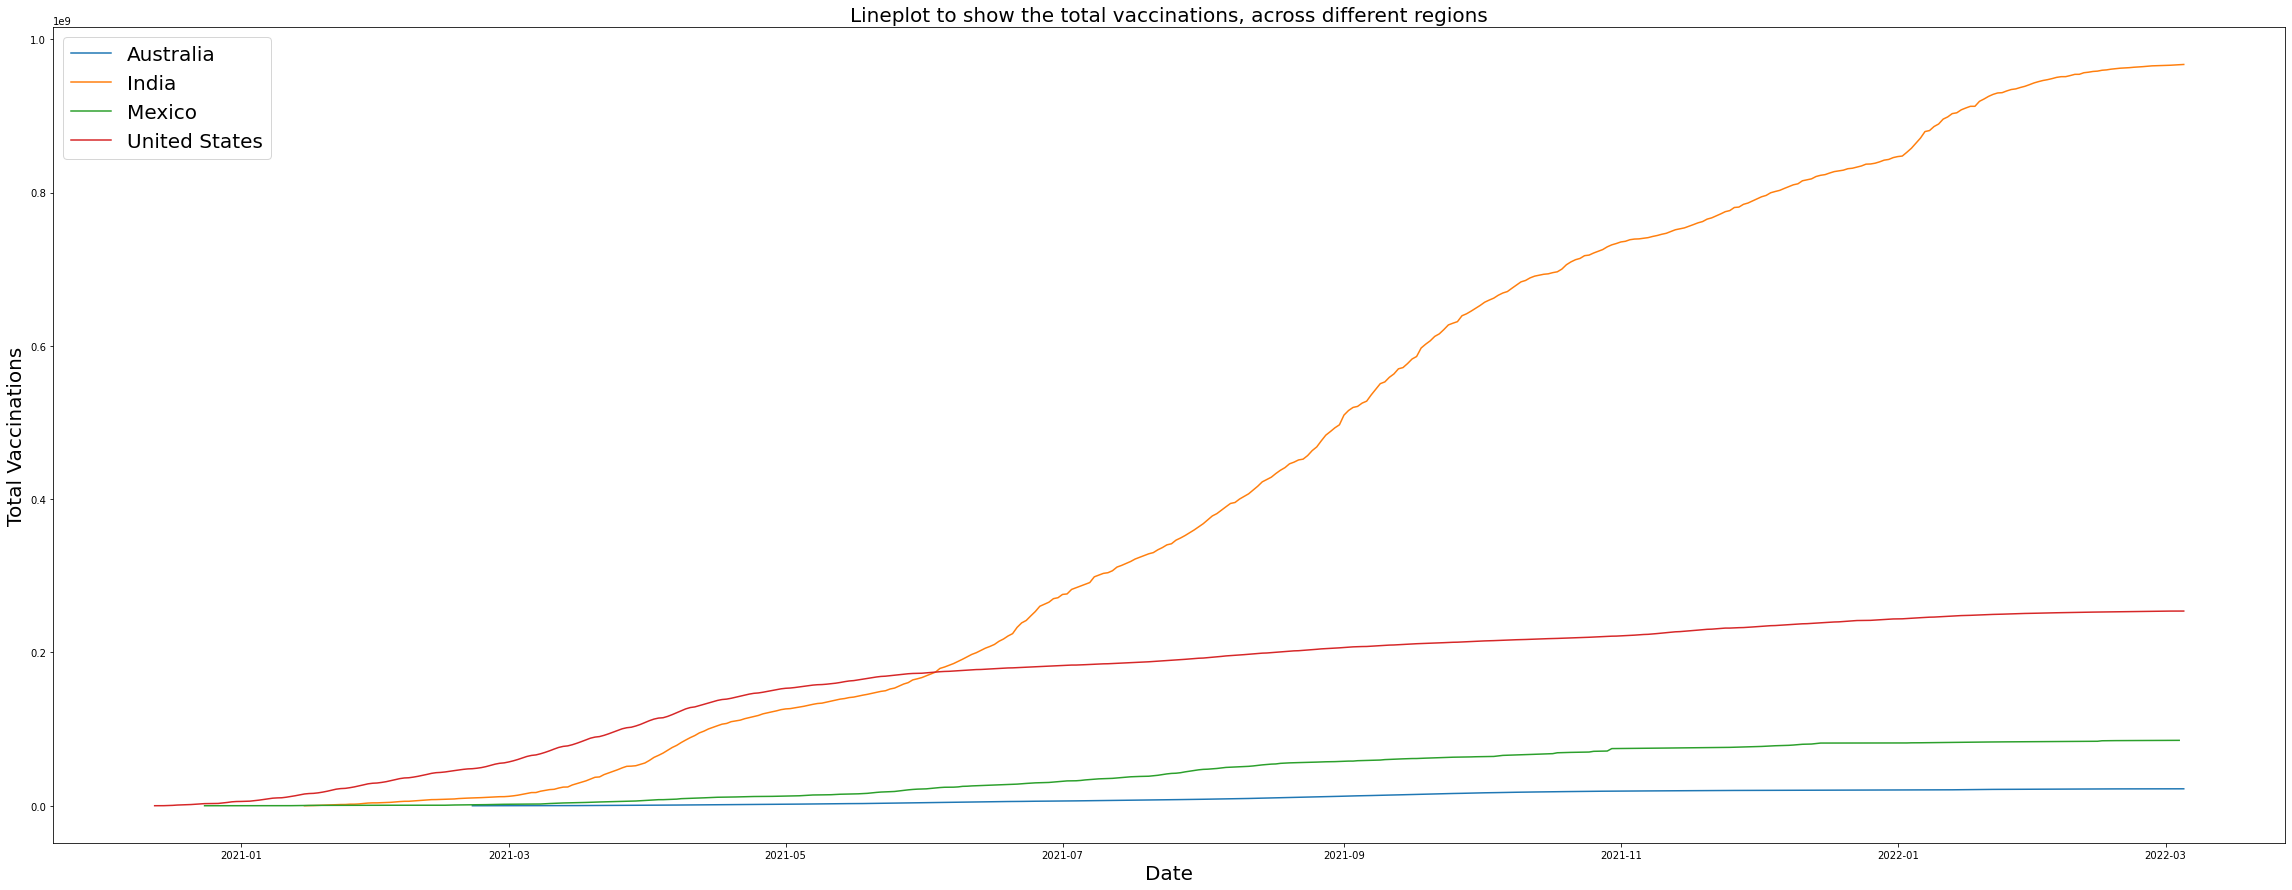

In [358]:
# Create datetime column for plotting through time.
data_df['datetime_date'] = pd.to_datetime(data_df['date'], format='%Y-%m-%d')

# temp data import 

temp_data = data_df[data_df['location'].isin(country)]

# Initiate figure and plot
fig, ax = plt.subplots(figsize = (40,15))
ax = sns.lineplot(data=temp_data, x="datetime_date", y="people_vaccinated", hue="location")

# Axis and formatting
ax.set_title("Lineplot to show the total vaccinations, across different regions", fontsize = 20)
ax.set_xlabel("Date", fontsize = 20)
ax.set_ylabel("Total Vaccinations", fontsize = 20)

ax.legend(loc="best", fontsize=20)

In [324]:
# filter location to United States only
Pop= country_df[["total_cases", "population"]] 
Pop = Pop.reset_index()
Pop.head()

,location,total_cases,population
0,Australia,3362035.0,2.578822e+07
1,India,42962953.0,1.393409e+09
2,United States,79265726.0,3.329151e+08
3,Mexico,5554392.0,1.302622e+08


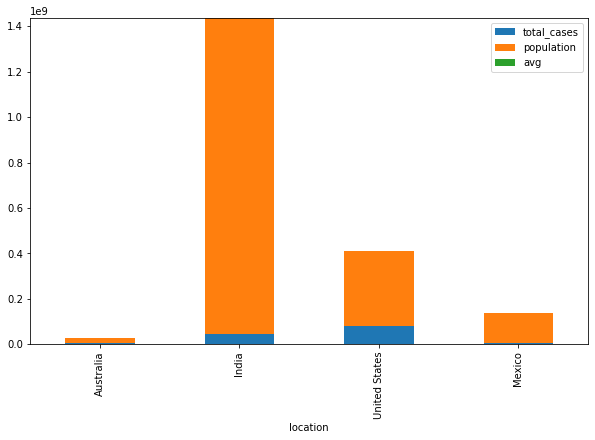

In [333]:
# total cases bar chart
Pop.plot(kind='bar' , x='location', stacked=True, figsize= (10,6));

In [332]:
# average cases per population
Pop['avg'] = (Pop['total_cases'] / Pop['population']) *100
Pop.head()

,location,total_cases,population,avg
0,Australia,3362035.0,2.578822e+07,13.037098
1,India,42962953.0,1.393409e+09,3.083298
2,United States,79265726.0,3.329151e+08,23.809594
3,Mexico,5554392.0,1.302622e+08,4.264008


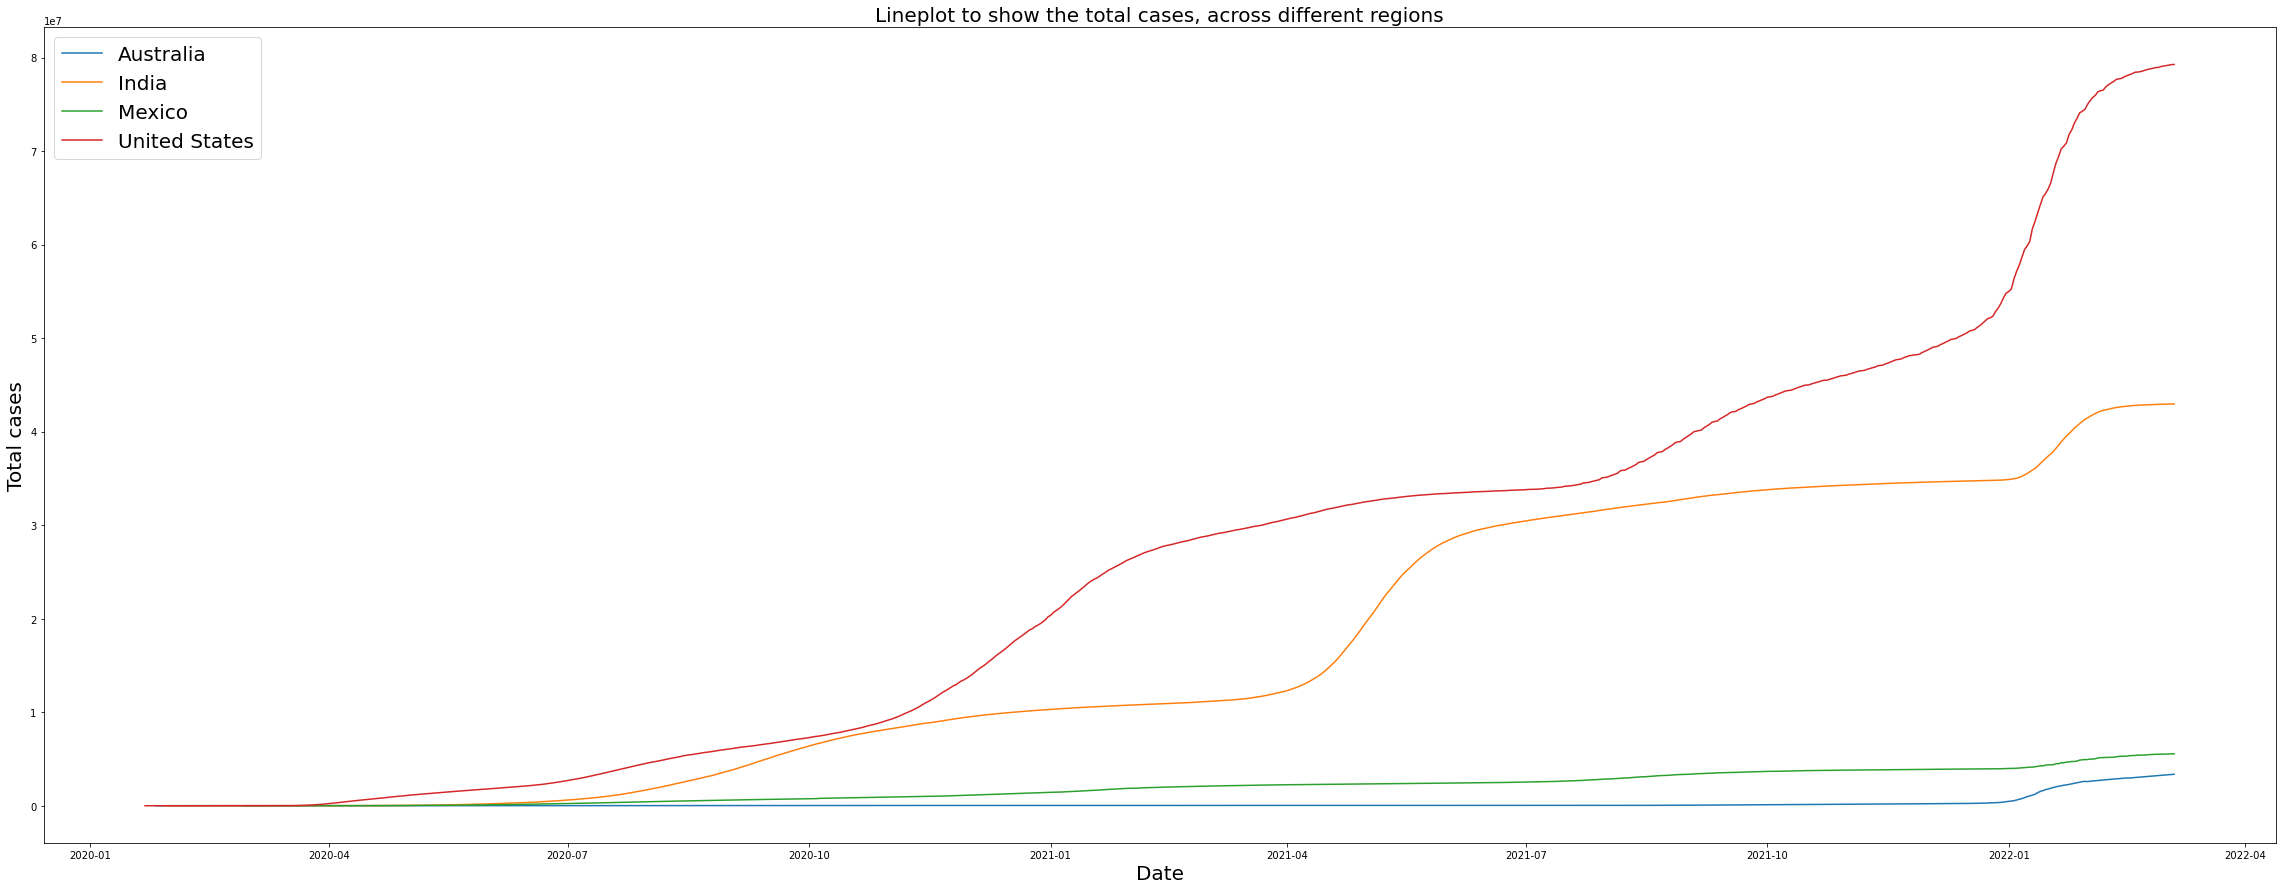

In [334]:
# Create datetime column for plotting through time.
data_df['datetime_date'] = pd.to_datetime(data_df['date'], format='%Y-%m-%d')

# create temp data  
temp_data = data_df[data_df['location'].isin(country)]

# Initiate figure and plot
fig, ax = plt.subplots(figsize = (40,15))
ax = sns.lineplot(data=temp_data, x="datetime_date", y="total_cases", hue="location")

# Axis and formatting
ax.set_title("Lineplot to show the total cases, across different regions", fontsize = 20)
ax.set_xlabel("Date", fontsize = 20)
ax.set_ylabel("Total cases", fontsize = 20)

ax.legend(loc="best", fontsize=20)

In [341]:
ICU = country_df[["total_deaths", "total_cases"]] 
ICU = ICU.reset_index()
ICU.head()

,location,total_deaths,total_cases
0,Australia,5416.0,3362035.0
1,India,515036.0,42962953.0
2,United States,958437.0,79265726.0
3,Mexico,319604.0,5554392.0


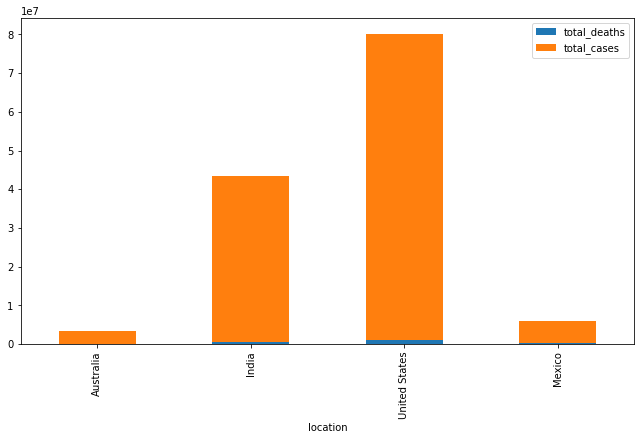

In [ ]:
# developed ICU + emergency vs cases bar chart
#ICU.plot(kind='bar' , x='location', title='ICU vs Cases', figsize= (10,5));
ICU.plot(kind='bar' , x='location', stacked=True, figsize= (10,6));


In [342]:
# average deaths to number of cases 
ICU['avg'] = (ICU['total_deaths'] / ICU['total_cases']) *100
ICU.head()

,location,total_deaths,total_cases,avg
0,Australia,5416.0,3362035.0,0.161093
1,India,515036.0,42962953.0,1.198791
2,United States,958437.0,79265726.0,1.209144
3,Mexico,319604.0,5554392.0,5.754077


In [344]:
# how many of the ICU patients died
ICU1 = country_df[["icu_patients","total_deaths"]] 
ICU1 = ICU1.reset_index()
ICU1.head()


,location,icu_patients,total_deaths
0,Australia,424.0,5416.0
1,India,NaN,515036.0
2,United States,28891.0,958437.0
3,Mexico,NaN,319604.0


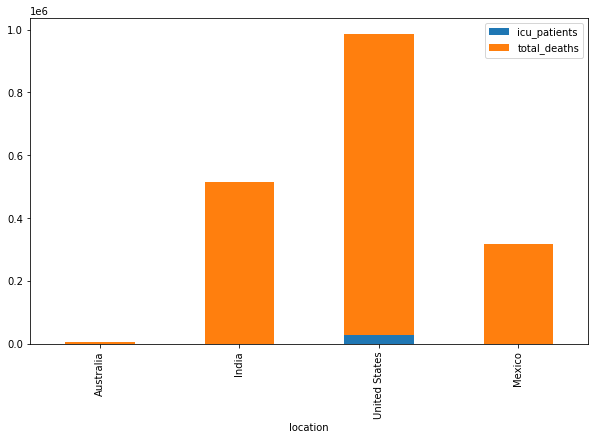

In [345]:
ICU1.plot(kind='bar' , x='location', stacked=True, figsize= (10,6));

In [346]:
# average ICU/ deaths
ICU1['avg'] = (ICU1['icu_patients'] / ICU1['total_deaths']) *100
ICU1.head()


,location,icu_patients,total_deaths,avg
0,Australia,424.0,5416.0,7.828656
1,India,NaN,515036.0,NaN
2,United States,28891.0,958437.0,3.014387
3,Mexico,NaN,319604.0,NaN


In [351]:
# number of people vaccinated over population
vac = total_vacination[["total_cases", "people_vaccinated","population"]] 
vac = vac.reset_index()
vac.head()


,location,total_cases,people_vaccinated,population
0,Australia,3362035.0,22091094.0,2.578822e+07
1,India,42962953.0,967153861.0,1.393409e+09
2,Mexico,5554392.0,85315634.0,1.302622e+08
3,United States,79265726.0,254002347.0,3.329151e+08


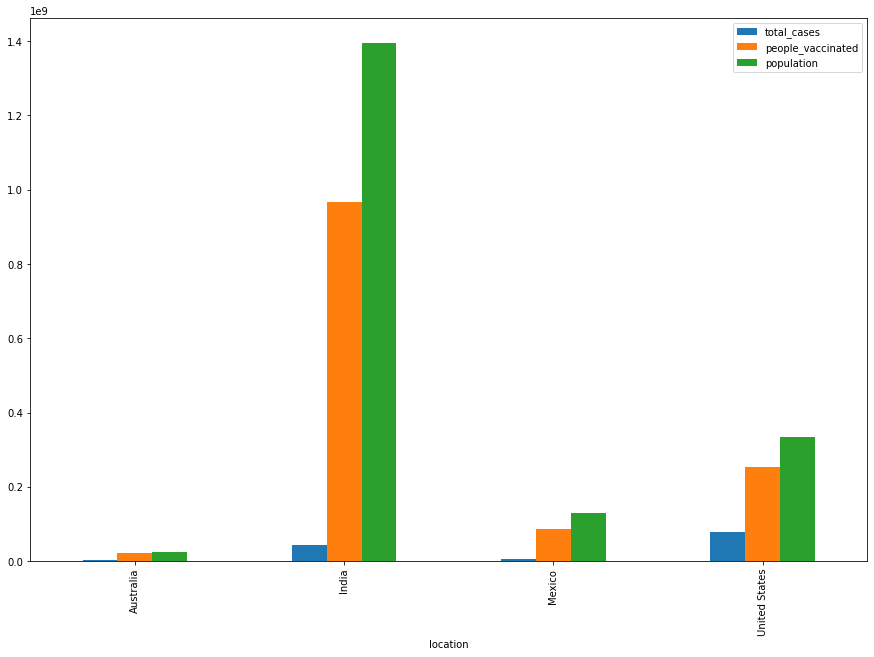

In [370]:
# vaccination box plot
vac.plot(x="location", y=["total_cases", "people_vaccinated", "population"], kind="bar", figsize=(15,10))

In [371]:
# average people vaccinated/ population total df
vac['avg'] = (vac['people_vaccinated'] / vac['population']) *100
vac.head()

,location,total_cases,people_vaccinated,population,avg
0,Australia,3362035.0,22091094.0,2.578822e+07,85.663518
1,India,42962953.0,967153861.0,1.393409e+09,69.409186
2,Mexico,5554392.0,85315634.0,1.302622e+08,65.495302
3,United States,79265726.0,254002347.0,3.329151e+08,76.296439
